# Matrices de co-occurrence et métriques de distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

## 2. Matrices de co-occurence

Pour les matrices, vous pourrez utiliser [des array `numpy`](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) ou des DataFrame [`pandas`](https://pandas.pydata.org/pandas-docs/stable/). 


In [2]:
M = pd.DataFrame([
    [ 2.0,  6.0], 
    [10.0, 14.0], 
    [14.0, 9.0]],
    index=['Excellent', 'Bon', 'Décevant'],
    columns=['doc x', 'doc y'])    

M

doc x  doc y
Excellent    2.0    6.0
Bon         10.0   14.0
Décevant    14.0    9.0

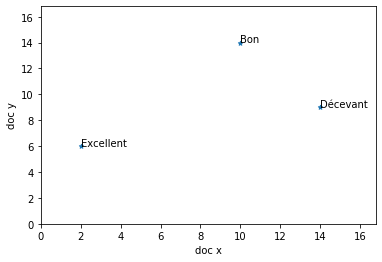

In [3]:
def genererFig(pdf):
    fig = pdf.plot.scatter(x='doc x', y='doc y', marker='*', legend=False)
    m = pdf.values.max(axis=None)
    fig.set_xlim([0, m*1.2])
    fig.set_ylim([0, m*1.2])
    for label, row in pdf.iterrows():
        fig.text(row['doc x'], row['doc y'], label)
        
genererFig(M)

**a)** Implémentez la fonction `get_euclidean_distance(v1 ,v2)` qui retourne la distance euclidienne entre les vecteurs v1 et v2.

In [4]:
from scipy.spatial.distance import euclidean, cosine

def euclidean_distance(v1, v2):
    return euclidean(v1, v2)

In [5]:
def calculerDistanceEuclidienne(df):
    for a, b in (('Excellent', 'Bon'), ('Bon', 'Décevant')):
        dist = euclidean_distance(df.loc[a], df.loc[b])
        print(a, b, dist)

In [6]:
calculerDistanceEuclidienne(M)

Excellent Bon 11.313708498984761
Bon Décevant 6.4031242374328485


**Distance Cosinus**


La distance cosinus entre deux vecteurs $u$ et $v$ de dimension $n$ s'écrit :

$$\textbf{cosine}(u, v) = 
1 - \frac{\sum_{i=1}^{n} u_{i} \cdot v_{i}}{\|u\|_{2} \cdot \|v\|_{2}}$$

Le terme de droite dans la soustraction mesure l'angle entre $u$ et $v$; on l'appelle la *similarité cosinus* entre $u$ et $v$.

**b)** Implémentez la fonction `get_cosinus_distance(v1, v2)` qui retourne la distance cosinus entre les vecteurs v1 et v2.

In [7]:
def cosinus_distance(v1, v2):
    return cosine(v1, v2)

In [8]:
def calculerDistanceCos(df):
    for a, b in (('Excellent', 'Bon'), ('Bon', 'Décevant')):
        dist = cosinus_distance(df.loc[a], df.loc[b])
        print(a, b, dist)

In [9]:
calculerDistanceCos(M)

Excellent Bon 0.044220991278050015
Bon Décevant 0.0710423905158224


**Distance de Jaccard**

In [10]:

def matchingCoefficient(v1, v2):
    return np.sum(np.minimum(v1, v2))


def jaccard_distance(v1, v2):
    return 1.0 - (matchingCoefficient(v1, v2) / np.sum(np.maximum(v1, v2)))

In [11]:
def calculerDistanceJacc(df):
    for a, b in (('Excellent', 'Bon'), ('Bon', 'Décevant')):
        dist = jaccard_distance(df.loc[a], df.loc[b])
        print(a, b, dist)

In [12]:
calculerDistanceJacc(M)

Excellent Bon 0.6666666666666667
Bon Décevant 0.3214285714285714
